# Import Modules

In [1]:
#numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from math import sqrt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


#cross validation
from sklearn.model_selection import train_test_split

# Import Data

In [2]:
#Import Data
rawData = pd.read_csv('clean_credit.csv')
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,0,3,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,0
1,2,120000,0,3,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,0
2,3,90000,0,3,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,1
3,4,50000,0,3,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,1
4,5,50000,1,3,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,1


# Check Data

In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [4]:
rawData.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

# Features / dependent variables

## LIMIT BALANCE as the dependent variable

In [5]:
#Features
X = rawData.iloc[:, [2,3,4,5,6,17,23,24]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,BILL_AMT6,PAY_AMT6,default payment next month
0,0,3,1,24,2,0,0,0
1,0,3,2,26,-1,3261,2000,0
2,0,3,2,34,0,15549,5000,1
3,0,3,1,37,0,29547,1000,1
4,1,3,1,57,-1,19131,679,1


In [6]:
#Dependent variable
y = rawData['LIMIT_BAL']

In [7]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 50)

# Linear Regression Model

In [8]:
#Create Regression model
regmod = LinearRegression(n_jobs=10)

In [9]:
#Train the model
regmod.fit(X_train, y_train)

LinearRegression(n_jobs=10)

In [10]:
#Predictions using test set
predreg = regmod.predict(X_test)

In [11]:
print(cross_val_score(regmod, X, y, cv=3)) 

[0.24522962 0.26896489 0.26361303]


In [12]:
r_square = r2_score(y_test, predreg)
print('R-square Error is:', r_square)

R-square Error is: 0.2614367812060492


# Random Forest Regressor

In [13]:
#Create Random Forest
rfrmod = RandomForestRegressor(n_estimators = 10, random_state = 50)

In [14]:
#Train the model
rfrmod.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=50)

In [15]:
#Predictions using test set
predrfr = rfrmod.predict((X_test))

In [16]:
print(cross_val_score(rfrmod, X, y, cv=3)) 

[0.33182123 0.32623773 0.29581633]


In [17]:
r_square = r2_score(y_test, predrfr)
print('R-square Error is:', r_square)

R-square Error is: 0.3138697474659543


# Support Vector Regressor

In [18]:
#Create SVR model
svrmod = SVR(kernel = 'rbf')

In [19]:
#Train the model
svrmod.fit(X_train, y_train)

SVR()

In [20]:
#Predictions using test set
predsvr = svrmod.predict((X_test))

In [21]:
print(cross_val_score(regmod, X, y, cv=3)) 

[0.24522962 0.26896489 0.26361303]


In [22]:
r_square = r2_score(y_test, predsvr)
print('R-square Error is:', r_square)

R-square Error is: -0.03818535485153829


In [23]:
algoClass = []

In [24]:
algoClass.append(('Random Forest Regressor', RandomForestRegressor()))
algoClass.append(('Linear Regression', LinearRegression()))
algoClass.append(('Support Vector Regression', SVR()))

In [25]:
algoClass

[('Random Forest Regressor', RandomForestRegressor()),
 ('Linear Regression', LinearRegression()),
 ('Support Vector Regression', SVR())]

In [26]:
#regression
results = []
names = []
for name, model in algoClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [27]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.3628905716412709
Linear Regression 0.2592691770783244
Support Vector Regression -0.05117565056871376


# Selected Model - Random Forest Regressor

In [28]:
#Features
X = rawData.iloc[:, [2,3,4,5,6,17,23,24]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,BILL_AMT6,PAY_AMT6,default payment next month
0,0,3,1,24,2,0,0,0
1,0,3,2,26,-1,3261,2000,0
2,0,3,2,34,0,15549,5000,1
3,0,3,1,37,0,29547,1000,1
4,1,3,1,57,-1,19131,679,1


In [29]:
#Dependent variable
y = rawData['LIMIT_BAL']

In [30]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 50)

In [31]:
#Create Random Forest
randmod = RandomForestRegressor(n_estimators = 80, random_state = 50)

In [32]:
#Train the model
randmod.fit(X_train, y_train)

RandomForestRegressor(n_estimators=80, random_state=50)

In [33]:
#Predictions using test set
predrand = randmod.predict((X_test))

In [34]:
#Make Predictions
predrand = randmod.predict(X_test)
predRsquared = r2_score(y_test,predrand)
rmse = sqrt(mean_squared_error(y_test, predrand))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.363
RMSE: 103075.564


# Plotting the result

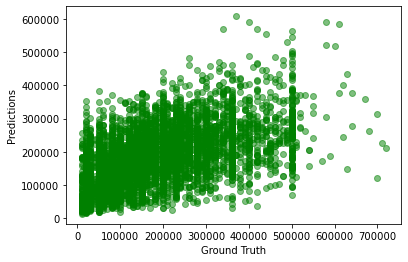

In [35]:
plt.scatter(y_test, predrand, color= 'green', alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()

# Default status as the dependent variable

In [36]:
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,0,3,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,0
1,2,120000,0,3,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,0
2,3,90000,0,3,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,1
3,4,50000,0,3,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,1
4,5,50000,1,3,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,1


In [37]:
rawData.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [38]:
#Features
X = rawData.drop(columns=['ID','default payment next month'])
print('Summary of feature sample')
X.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,0,3,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,0,3,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,0,3,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,0,3,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,3,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [39]:
#Dependent variable
y = rawData['default payment next month']
y.head()

0    0
1    0
2    1
3    1
4    1
Name: default payment next month, dtype: int64

In [40]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 50)

# Random Forest Classifier

In [41]:
#Create Random Forest Classifier model
forest = RandomForestClassifier()

In [42]:
#Train the model
forest.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
#Predictions using test set
predfor = forest.predict(X_test)

In [44]:
# View accuracy score
accuracy_score(y_test, predfor)

0.8233333333333334

In [45]:
#View confusion matrix for test data and predictions
confusion_matrix(y_test, predfor)

array([[ 753, 1173],
       [ 417, 6657]])

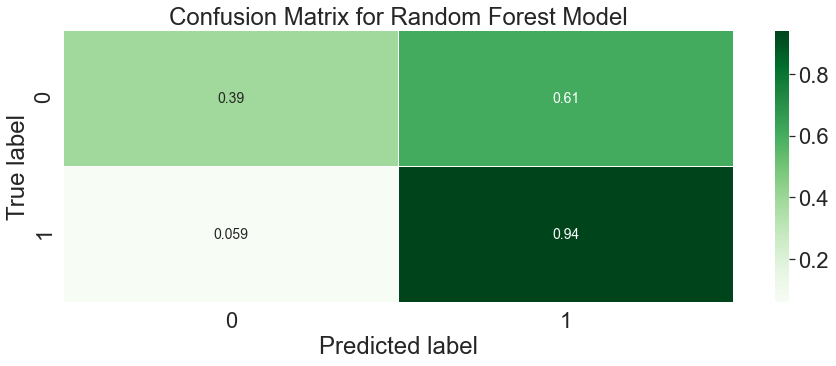

In [46]:
#Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, predfor)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#Build the plot
plt.figure(figsize=(15,5))
sns.set(font_scale=2)
sns.heatmap(matrix, annot=True, annot_kws={'size':14},
            cmap=plt.cm.Greens, linewidths=0.2)

#Add labels to the plot
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [47]:
print(cross_val_score(forest, X, y, cv=3)) 

[0.8076 0.8215 0.821 ]


In [48]:
#View the classification report for test data and predictions
print(classification_report(y_test, predfor))

              precision    recall  f1-score   support

           0       0.64      0.39      0.49      1926
           1       0.85      0.94      0.89      7074

    accuracy                           0.82      9000
   macro avg       0.75      0.67      0.69      9000
weighted avg       0.81      0.82      0.81      9000



# Linear Regression Model

In [49]:
#Create Regression model
linregmod = LinearRegression()

In [50]:
#Train the model
linregmod.fit(X_train, y_train)

LinearRegression()

In [51]:
#Predictions using test set
predlinreg = linregmod.predict(X_test)

In [52]:
print(cross_val_score(regmod, X, y, cv=3)) 

[0.10403986 0.13232842 0.1236183 ]


In [53]:
r_square = r2_score(y_test, predlinreg)
print('R-square Error is:', r_square)

R-square Error is: 0.12269313595930165


# Gradient Boosting Classification Model

In [54]:
#Create Gradient boosting model
gradb = GradientBoostingClassifier(learning_rate=0.1)

In [55]:
#Train the model
gradb.fit(X_train, y_train)

GradientBoostingClassifier()

In [56]:
#Predictions using test set
predgradb = gradb.predict(X_test)

In [62]:
print(cross_val_score(gradb, X, y, cv=3)) 

[0.8099 0.8249 0.8261]


In [63]:
#View the classification report for test data and predictions
print(classification_report(y_test, predgradb))

              precision    recall  f1-score   support

           0       0.67      0.37      0.48      1926
           1       0.85      0.95      0.90      7074

    accuracy                           0.83      9000
   macro avg       0.76      0.66      0.69      9000
weighted avg       0.81      0.83      0.81      9000



In [76]:
#View confusion matrix for test data and predictions
confusion_matrix(y_test, predgradb)

array([[ 721, 1205],
       [ 358, 6716]])

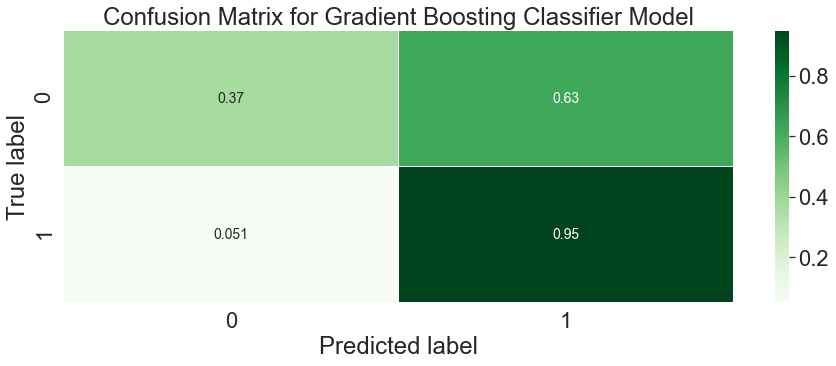

In [78]:
#Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, predgradb)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#Build the plot
plt.figure(figsize=(15,5))
sns.set(font_scale=2)
sns.heatmap(matrix, annot=True, annot_kws={'size':14},
            cmap=plt.cm.Greens, linewidths=0.2)

#Add labels to the plot
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Gradient Boosting Classifier Model')
plt.show()

In [64]:
algoClass1 = []

In [65]:
algoClass1.append(('Random Forest Classifier', RandomForestClassifier()))
algoClass1.append(('Linear Regression', LinearRegression()))
algoClass1.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))

In [73]:
#classifier
results1 = []
names1 = []
for name, model in algoClass1:
    result = cross_val_score(model, X,y, cv=3)
    names1.append(name)
    results1.append(result)

In [74]:
for i in range(len(names1)):
    print(names1[i],results1[i].mean())

Random Forest Classifier 0.8166666666666668
Linear Regression 0.11999552368663287
Gradient Boosting Classifier 0.8202999999999999
